In [3]:
import pickle
import numpy as np
# import networkx as nx
import matplotlib.pyplot as plt
# from scipy import stats
from esfMRI import stats_tests
from statsmodels.stats import nonparametric

In [4]:
keys = ['k_core', 'clustering', 'modularity', 'degree_assortativity_coefficient', 'global_efficiency', 'local_efficiency']#, 'ratio']

In [5]:
with open("graph_theory/graphs.pkl", "rb") as f:
    graphs = pickle.load(f)

In [6]:
key = "clustering"
for sub in graphs:
    measure_preop = 0
    measure_postop = 0
    cnt = 0
    for run, graph in graphs[sub]["ses-preop"].items():
        cnt += 1
        if key == "clustering":
            measure_preop += sum(graph[key].values())/116
            # print(sum(graph[key].values())/116)
        # elif not np.isnan(graph[key]):
            # print(graph[key])
    # print()
    measure_preop = measure_preop/cnt
    cnt = 0
    for run, graph in graphs[sub]["ses-postop"].items():
        cnt += 1
        if key == "clustering":
            measure_postop += sum(graph[key].values())/116
        #     print(sum(graph[key].values())/116)
        # elif not np.isnan(graph[key]):
        #     print(graph[key])
    measure_postop = measure_postop/cnt
    print(measure_preop, measure_postop)

0.6194884600833441 0.36490056686393735
0.5650541967904902 0.5277707525838868
0.5227918177989862 0.4361314798510576
0.31770998398153566 0.28844642899062667
0.6472693250594627 0.4416200735291517
0.3907446274664165 0.5594499021896919
0.4279221656230375 0.429602367478774
0.4286665441837854 0.5164141577679171
0.6286369060773512 0.3498913246307397
0.5143750168672493 0.44093816687690246
0.168656408665383 0.17301387925673462
0.5828174085254393 0.5604222108752547
0.3133545305832325 0.3491915663387548
0.5745481543143381 0.5327756580250751
0.6088107566405133 0.5217198452601546
0.6003120428604143 0.48662371799938386
0.4485615249619543 0.4851644365058363
0.4551723846703826 0.47740234796767467
0.6278935079891184 0.37724730594156486
0.697395553110102 0.5040379202999065


In [7]:
# 对每个参数整体应用统计学分析
for key in keys:
    measures_preop = []
    measures_postop = []
    for sub in graphs:
        for run, graph in graphs[sub]["ses-preop"].items():
            if key == "clustering":
                measures_preop.append(sum(graph[key].values())/116)
            elif not np.isnan(graph[key]):
                measures_preop.append(graph[key])
        for run, graph in graphs[sub]["ses-postop"].items():
            if key == "clustering":
                measures_postop.append(sum(graph[key].values())/116)
            elif not np.isnan(graph[key]):
                measures_postop.append(graph[key])
    p_values = stats_tests(measures_preop, measures_postop, False)
    #     print(p_values)
    # else:
    print(key)
    if np.any(p_values[4:5] > 0.05):
        print("无明显变化")
    print(sum(measures_preop)/len(measures_preop), sum(measures_postop)/len(measures_postop))
    print(nonparametric.rank_compare_2indep(measures_preop, measures_postop).tuple)
    print()

k_core
18.271186440677965 10.78225806451613
(3.5777571793472034, 0.0006278687544275844)

clustering
0.5036242340701673 0.42831556601054516
(3.3542868301825366, 0.0012630603700364226)

modularity
0.3969259107538807 0.5395620434183688
(-4.357498039065151, 4.4915576487471325e-05)

degree_assortativity_coefficient
无明显变化
0.3610935037244088 0.37301312164720424
(-0.4412944397452481, 0.6596977536935209)

global_efficiency
0.35891723304123 0.23567027091724752
(5.03830539575699, 3.6644414622402904e-06)

local_efficiency
0.6089266852989381 0.5168289154232767
(3.8663531002476645, 0.00024188659625942513)



In [14]:
save_dir = "states/total"
plt.rcParams['font.family']=['Times New Roman']
fontsize = 12
plt.rcParams['font.size']=fontsize
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
fig_format = "jpg"

In [12]:
trans = {'k_core':"k核", 'clustering':"聚类系数", 'modularity':"模块度", 'degree_assortativity_coefficient':"同配系数", 'global_efficiency':"全局效率", 'local_efficiency':"局部效率"}

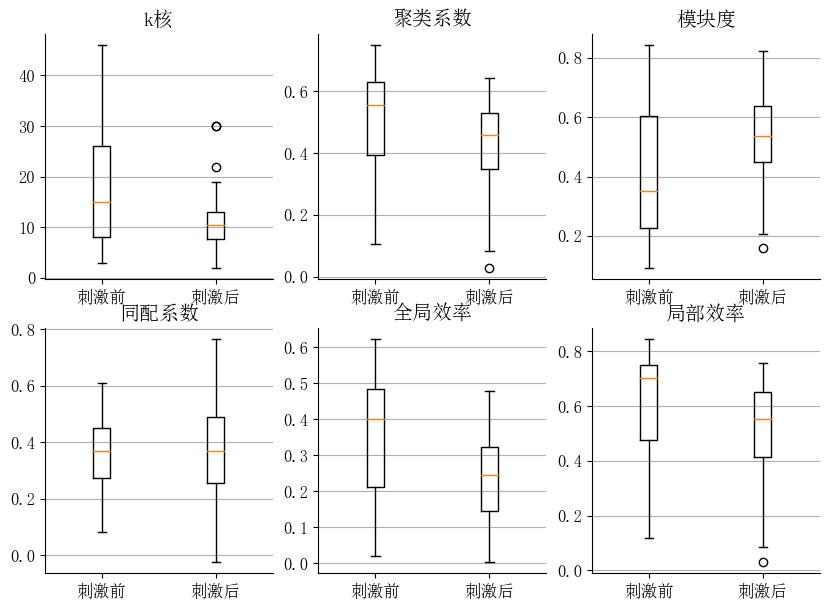

In [15]:
# 状态图论分析绘制箱线图
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
i = 0
for key in keys:
    measures_preop = []
    measures_postop = []
    for sub in graphs:
        for run, graph in graphs[sub]["ses-preop"].items():
            if key == "clustering":
                measures_preop.append(sum(graph[key].values())/116)
            elif not np.isnan(graph[key]):
                measures_preop.append(graph[key])
        for run, graph in graphs[sub]["ses-postop"].items():
            if key == "clustering":
                measures_postop.append(sum(graph[key].values())/116)
            elif not np.isnan(graph[key]):
                measures_postop.append(graph[key])

    # 箱线图
    r = ax[i//3, i%3].boxplot([measures_preop, measures_postop])
    # r = ax.violinplot([measures_preop, measures_postop], showmeans=True, showmedians=True)
    # r['cmeans'].set_color('red')
    # r['cmeans'].set_label('means')
    # r['cmedians'].set_color('green')
    # r['cmedians'].set_label('medians')
    # ax.legend(loc='upper center')
    ax[i//3, i%3].yaxis.grid(True)
    ax[i//3, i%3].set_xticks([y + 1 for y in range(2)], labels=["刺激前", "刺激后"])
    ax[i//3, i%3].set_title(trans[key])
    ax[i//3, i%3].spines['top'].set_visible(False)
    ax[i//3, i%3].spines['right'].set_visible(False)
    i += 1
fig.savefig(f"{save_dir}/figs/boxplot.{fig_format}", dpi=600, format=fig_format, bbox_inches = "tight")

In [10]:
fontsize = 18
plt.rcParams['font.size']=fontsize
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
fig_format = "jpg"

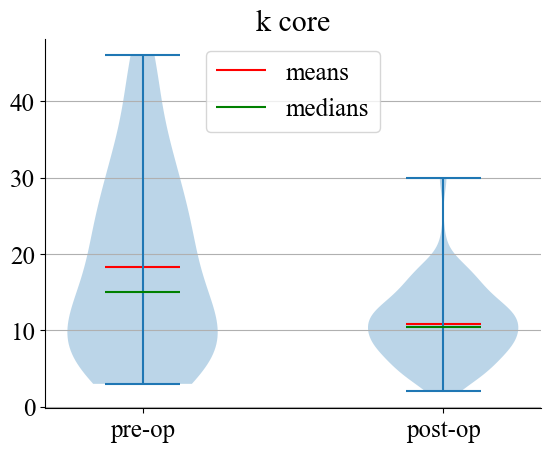

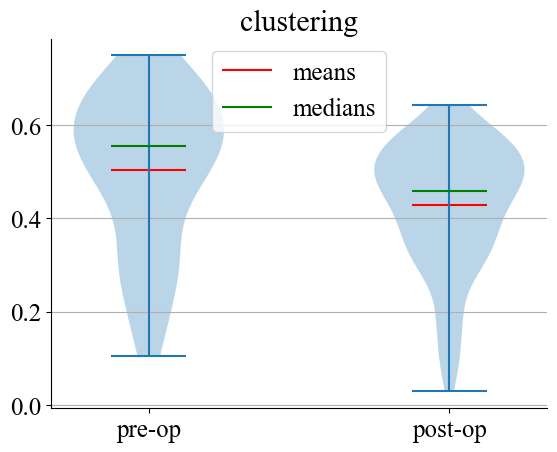

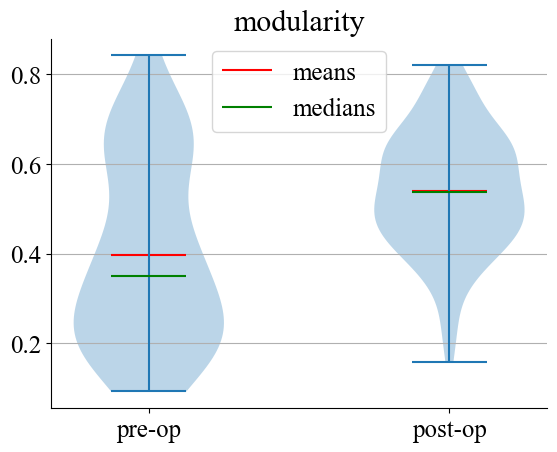

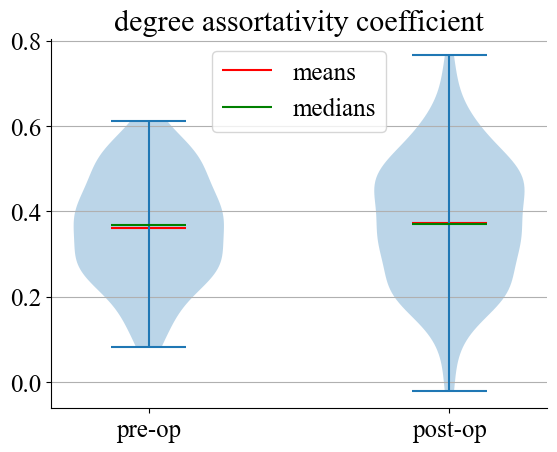

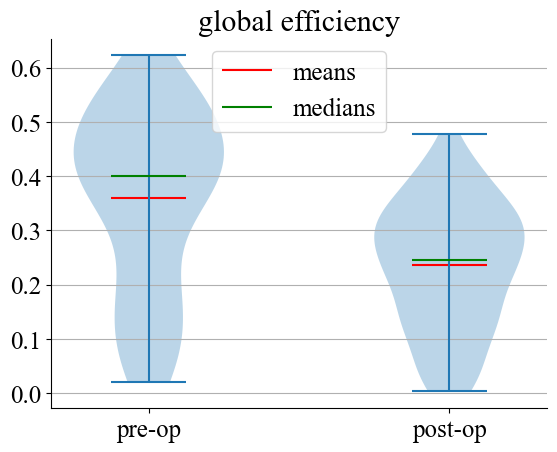

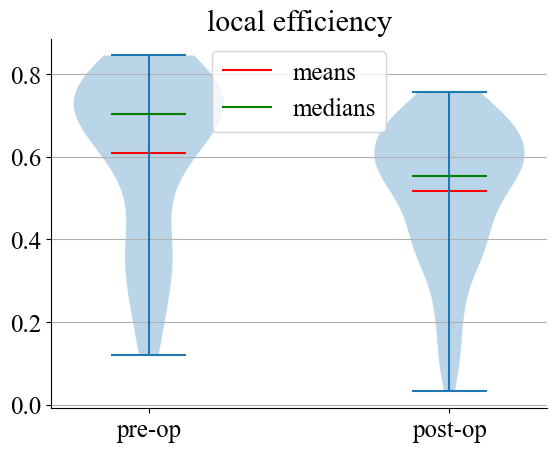

In [11]:
# 状态图论分析绘制箱线图
for key in keys:
    measures_preop = []
    measures_postop = []
    for sub in graphs:
        for run, graph in graphs[sub]["ses-preop"].items():
            if key == "clustering":
                measures_preop.append(sum(graph[key].values())/116)
            elif not np.isnan(graph[key]):
                measures_preop.append(graph[key])
        for run, graph in graphs[sub]["ses-postop"].items():
            if key == "clustering":
                measures_postop.append(sum(graph[key].values())/116)
            elif not np.isnan(graph[key]):
                measures_postop.append(graph[key])

    # 箱线图
    fig, ax = plt.subplots()
    # r = ax.boxplot([measures_preop, measures_postop])
    r = ax.violinplot([measures_preop, measures_postop], showmeans=True, showmedians=True)
    r['cmeans'].set_color('red')
    r['cmeans'].set_label('means')
    r['cmedians'].set_color('green')
    r['cmedians'].set_label('medians')
    ax.legend(loc='upper center')
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(2)], labels=["pre-op", "post-op"])
    ax.set_title(key.replace("_", " "))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.savefig(f"{save_dir}/figs/{key}.{fig_format}", dpi=300, format=fig_format, bbox_inches = "tight")